# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [251]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [252]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [253]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [254]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [257]:
# Extract all rows of data
text_elements = html_soup.find_all()
for element in text_elements:
    word=element.text


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [193]:
# Create an empty list
mars_list=[]
# Loop through the scraped data to create a list of rows
rows = html_soup.find_all("tr", class_="data-row")
 #main_area = soup.find("div", class_="post-archive-container")

# Loop through the rows
for row in rows:
    id_ = row.find_all('td')[0].text
    terrestrial_date = row.find_all('td')[1].text
    sol= row.find_all('td')[2].text
    ls= row.find_all('td')[3].text
    month= row.find_all('td')[4].text
    min_temp= row.find_all('td')[5].text
    pressure= row.find_all('td')[6].text
    
    summary_dict = {
            "ID": id_,
            "Terrestrial Date": terrestrial_date,
            "Sol": sol,
            "ls": ls,
            "Month": month,
            "Min Temp (C)": min_temp,
            "Pressure": pressure
        }
        # Append the summary dictionary to the list
    mars_list.append(summary_dict)

In [194]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df=pd.DataFrame(mars_list, columns=["ID","Terrestrial Date","Sol","ls","Month","Min Temp (C)",
                                        "Pressure"])

In [195]:
# Confirm DataFrame was created successfully
mars_df

,ID,Terrestrial Date,Sol,ls,Month,Min Temp (C),Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [196]:
# Examine data type of each column
print(mars_df.dtypes)

ID                  object
Terrestrial Date    object
Sol                 object
ls                  object
Month               object
Min Temp (C)        object
Pressure            object
dtype: object


In [197]:
# Change data types for data analysis
mars_df['ID'] = mars_df['ID'].astype(int)
mars_df['Terrestrial Date'] = pd.to_datetime(mars_df['Terrestrial Date'], format='%Y/%m/%d')
mars_df['Sol'] = mars_df['Sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['Month'] = mars_df['Month'].astype(int)
mars_df['Min Temp (C)'] = mars_df['Min Temp (C)'].astype(float)
mars_df['Pressure'] = mars_df['Pressure'].astype(float)

In [198]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

ID                           int64
Terrestrial Date    datetime64[ns]
Sol                          int64
ls                           int64
Month                        int64
Min Temp (C)               float64
Pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [210]:
# 1. How many months are there on Mars?
mars_df['Month'].nunique()
months=mars_df['Month'].nunique()
print('There are', months, 'months on Mars')

There are 12 months on Mars


In [225]:
# 2. How many Martian days' worth of data are there?
#days=mars_df['Sol'].nunique()
#print('There are', days, 'Martian days worth of data')
rows = html_soup.find_all('tr')
last_row=rows[-1]
days = last_row.find_all('td')
total_days= days[2]
print('There are',total_days.text, 'days of Martian data')

There are 1977 days of Martian data


In [230]:
# 3. What is the average low temperature by month?
months=mars_df.groupby('Month')["Min Temp (C)"].mean()
all_months= pd.DataFrame(months)
all_months

,Min Temp (C)
Month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


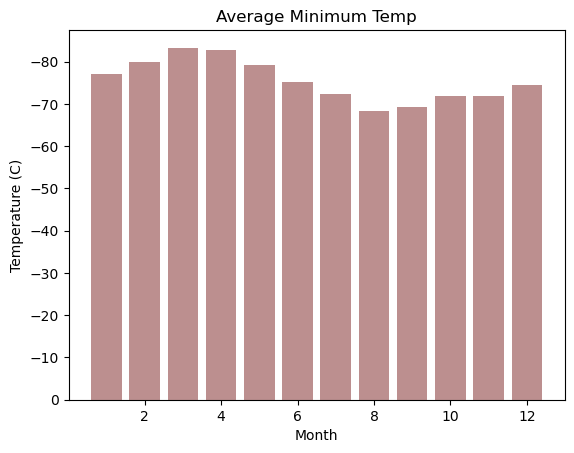

In [231]:
# Plot the average temperature by month
av_month=pd.DataFrame(months)
line_plot= plt.bar(av_month.index, height=av_month['Min Temp (C)'], color="rosybrown")
plt.title("Average Minimum Temp")
plt.xlabel("Month")
plt.ylabel("Temperature (C)")
plt.gca().invert_yaxis()
plt.show()

In [232]:
# Identify the coldest and hottest months in Curiosity's location
temp=av_month["Min Temp (C)"].min()
coldest_month=av_month.loc[av_month['Min Temp (C)'] == temp].index[0]
temp2=av_month["Min Temp (C)"].max()
hottest_month=av_month.loc[av_month['Min Temp (C)'] == temp2].index[0]
print('The coldest month on mars is', coldest_month,  'and the hottest month is ', hottest_month)

The coldest month on mars is 3 and the hottest month is  8


In [235]:
# 4. Average pressure by Martian month
pressure=mars_df.groupby('Month')["Pressure"].mean()
all_press=pd.DataFrame(pressure)
all_press

,Pressure
Month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


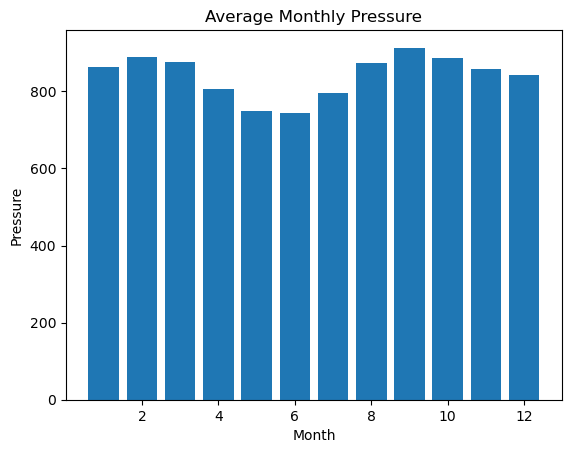

In [236]:
# Plot the average pressure by month
av_press=pd.DataFrame(pressure)
#av_month.plot(x='Month', y='Min Temp (C)', kind='bar')
#plt.show()
pressure_plot= plt.bar(av_press.index, height=av_press['Pressure'])
plt.title("Average Monthly Pressure")
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.show()

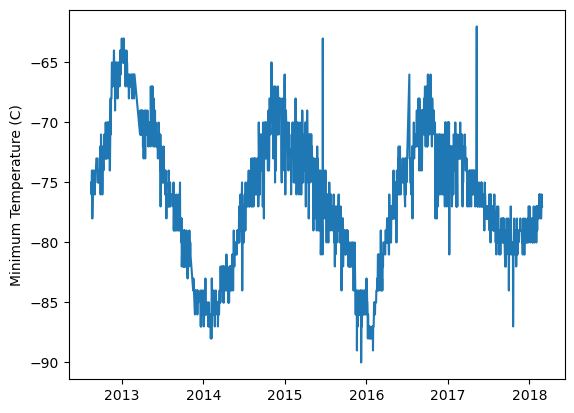

In [237]:
# 5. How many terrestrial (earth) days are there in a Martian year?
temp_df = mars_df[['Terrestrial Date', 'Min Temp (C)']]

# Set the index to the terrestrial date
temp_df = temp_df.set_index('Terrestrial Date')

# Plot the data
temp_df_plot=plt.plot(temp_df)
plt.ylabel('Minimum Temperature (C)')
plt.show()

In [238]:
#grouping the data by terrestrial year
months=mars_df.groupby(mars_df["Terrestrial Date"].dt.year).count()

#dropping certain years in order to just use the data from peak to peak
days=months.drop([2012,2013,2016,2017,2018])
sum=days["Terrestrial Date"].sum()

#Redoing the equations multiple times with different year sets
days1=months.drop([2012,2015,2016,2017,2018])
sum1=days1["Terrestrial Date"].sum()
days2=months.drop([2012,2013,2014,2017,2018])
sum2=days2["Terrestrial Date"].sum()
days3=months.drop([2012,2013,2014,2015,2018])
sum3=days3["Terrestrial Date"].sum()

#Taking the average of all the peak-to-peak data collected, in order to make a more accurate estimation 
average= (sum + sum1 + sum2 + sum3)/4
print("There are approximately", average, "days in one year on Mars")

There are approximately 680.25 days in one year on Mars


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [247]:
# Write the data to a CSV
mars_df.to_csv('Mars_data.csv', index=False)


In [246]:
browser.quit()